# Feature differentiating

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
import scipy.stats as stats
import time
import stationarity as st

import sys
sys.path.insert(0, '..')
from multiprocess import mp_pandas_obj
import useful_functions as uf

In [82]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [83]:
df = df[["close"]]

In [4]:
ds_close = df.iloc[::200, :].close

In [6]:
df["ds_close"] = ds_close

In [9]:
df.ds_close.ffill()

time
2017-08-17 04:21:13.356     4266.29
2017-08-17 04:29:19.766     4266.29
2017-08-17 04:33:00.057     4266.29
2017-08-17 04:39:32.027     4266.29
2017-08-17 04:43:05.191     4266.29
                             ...   
2021-06-19 16:27:04.502    35872.38
2021-06-19 16:27:20.667    35872.38
2021-06-19 16:27:26.627    35872.38
2021-06-19 16:27:44.405    35872.38
2021-06-19 16:27:48.270    35872.38
Name: ds_close, Length: 11798850, dtype: float64

In [29]:
df = df[-80_000:]

In [5]:
# Set indicator to be pandas series (ie df.close)
ind, x = ds_close, ds_close

In [6]:
# x = np.log(ind).cumsum()
x

time
2017-08-17 04:21:13.356     4266.29
2017-08-18 05:32:48.180     4330.82
2017-08-19 11:56:20.698     3942.00
2017-08-21 15:52:29.174     4020.00
2017-08-22 23:26:21.969     4001.99
                             ...   
2021-06-19 14:46:47.152    36163.66
2021-06-19 15:01:59.744    36280.17
2021-06-19 15:28:38.238    36049.65
2021-06-19 15:56:38.063    36139.22
2021-06-19 16:20:07.959    35822.81
Name: close, Length: 58995, dtype: float64

In [67]:
start = time.time()
new_ind = st.frac_diff_ffd(x.to_frame(),0.45,thres=1e-5) #x.to_frame() or df.close.to_frame()
print(time.time()-start)

185.5400002002716


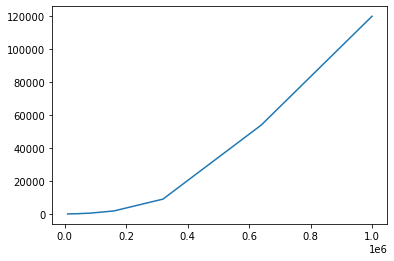

In [48]:
plt.plot([10_000, 20_000, 40_000, 80_000, 160_000, 320_000, 640_000, 1_000_000], [15, 45, 131, 450, 1_800, 9_000, 54_000, 120_000])

## 'up' sample

In [68]:
df["close"] = ds_close
df.close.ffill()
# new_ind = df.close.to_frame()

time
2017-08-17 04:21:13.356     4266.29
2017-08-17 04:29:19.766     4266.29
2017-08-17 04:33:00.057     4266.29
2017-08-17 04:39:32.027     4266.29
2017-08-17 04:43:05.191     4266.29
                             ...   
2021-06-19 16:27:04.502    35822.81
2021-06-19 16:27:20.667    35822.81
2021-06-19 16:27:26.627    35822.81
2021-06-19 16:27:44.405    35822.81
2021-06-19 16:27:48.270    35822.81
Name: close, Length: 11798850, dtype: float64

## Tests

In [69]:
joined = new_ind.join(ind.rename('original'), how='left') 
joined.corr()

,close,original
close,1.000000,0.880311
original,0.880311,1.000000


In [70]:
adfuller(new_ind, maxlag=2,regression='c',autolag=None)

(-23.95203090249878,
 0.0,
 2,
 57830,
 {'1%': -3.4304630830068876,
  '5%': -2.861589980515763,
  '10%': -2.566796602949566})

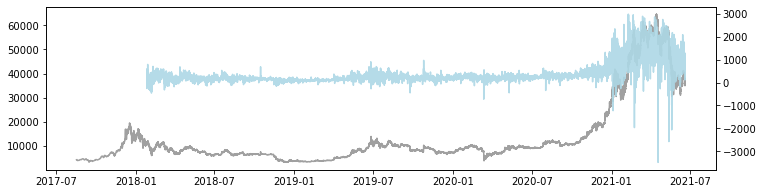

In [71]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(ind, color="gray", alpha=0.75)
axi = ax.twinx()
axi.plot(new_ind, color="lightblue", alpha=.9);

In [72]:
test = new_ind.close.map(lambda x: uf.log_abs(x+100000))
joined = test.to_frame().join(ind.rename('original'), how='left') 
joined.corr()

,close,original
close,1.000000,0.880465
original,0.880465,1.000000


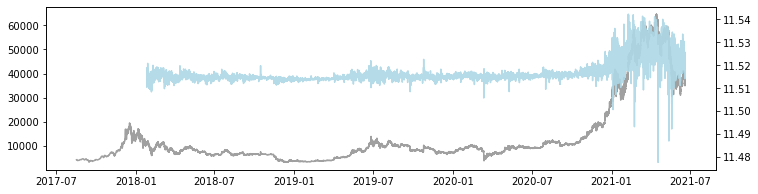

In [73]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(ind, color="gray", alpha=0.75)
axi = ax.twinx()
axi.plot(test, color="lightblue", alpha=.9);

## Saving

In [86]:
new_ind

,close
2018-01-26 07:54:22.617,58.677005
2018-01-26 08:09:22.234,-208.199918
2018-01-26 08:22:10.896,-33.980761
2018-01-26 08:33:13.873,-258.444682
2018-01-26 08:46:10.997,156.366571
...,...
2021-06-19 14:46:47.152,988.816613
2021-06-19 15:01:59.744,1059.471712
2021-06-19 15:28:38.238,755.988636
2021-06-19 15:56:38.063,922.442554


In [108]:
df["ind"] = new_ind.close
df.ind.ffill().to_csv("../data/i16.csv")

In [107]:
df

,close,ind
time,,
2017-08-17 04:21:13.356,4266.29,NaN
2017-08-17 04:29:19.766,4267.47,NaN
2017-08-17 04:33:00.057,4267.99,NaN
2017-08-17 04:39:32.027,4300.38,NaN
2017-08-17 04:43:05.191,4300.38,NaN
...,...,...
2021-06-19 16:27:04.502,35841.54,578.297117
2021-06-19 16:27:20.667,35823.32,578.297117
2021-06-19 16:27:26.627,35826.83,578.297117
